In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [2]:
from fastai.imports import *

In [3]:
path = Path('/kaggle/input/playground-series-s3e13/')

In [4]:
path.ls()

(#3) [Path('/kaggle/input/playground-series-s3e13/sample_submission.csv'),Path('/kaggle/input/playground-series-s3e13/train.csv'),Path('/kaggle/input/playground-series-s3e13/test.csv')]

In [5]:
df = pd.read_csv(path/'train.csv')
df['prognosis'] = pd.Categorical(df['prognosis'])
tst_df = pd.read_csv(path/'test.csv')
tst_xs = tst_df.drop(columns=['id'])

In [6]:
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [7]:
df.prognosis.head()

0         Lyme_disease
1            Tungiasis
2         Lyme_disease
3                 Zika
4    Rift_Valley_fever
Name: prognosis, dtype: category
Categories (11, object): ['Chikungunya', 'Dengue', 'Japanese_encephalitis', 'Lyme_disease', ..., 'Tungiasis', 'West_Nile_fever', 'Yellow_Fever', 'Zika']

In [8]:
len(df.prognosis.unique())

11

In [9]:
from sklearn.model_selection import train_test_split
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df['prognosis'] = trn_df['prognosis'].cat.codes
val_df['prognosis'] = val_df['prognosis'].cat.codes
trn_xs = trn_df.copy().drop(columns=['id', 'prognosis'])
trn_ys = trn_df['prognosis']
val_xs = val_df.copy().drop(columns=['id', 'prognosis'])
val_ys = val_df['prognosis']
len(trn_df), len(val_df)

(530, 177)

In [10]:
trn_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
535,535,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
329,329,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
306,306,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
282,282,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
413,413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,7


In [11]:
val_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
304,304,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
51,51,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
658,658,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
311,311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47,47,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
m = DecisionTreeClassifier(min_samples_leaf=25).fit(trn_xs, trn_ys);

In [13]:
import graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

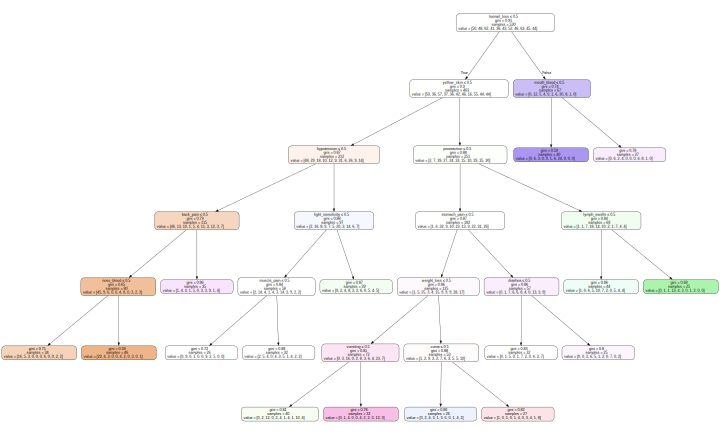

In [14]:
draw_tree(m, trn_xs)

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_ys, m.predict(val_xs))

2.7062146892655368

In [16]:
df.prognosis.cat.categories

Index(['Chikungunya', 'Dengue', 'Japanese_encephalitis', 'Lyme_disease',
       'Malaria', 'Plague', 'Rift_Valley_fever', 'Tungiasis',
       'West_Nile_fever', 'Yellow_Fever', 'Zika'],
      dtype='object')

In [17]:

def submit(preds, name):
    tst_df['prognosis'] = df.prognosis.cat.categories[preds]
    sub_df = tst_df[['id', 'prognosis']]
    sub_df.to_csv(f'sub-{name}.csv', index=False)

In [18]:
submit(m.predict(tst_xs), 'tree')

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100)
rf.fit(trn_xs, trn_ys)

RandomForestClassifier()

In [20]:
mean_absolute_error(val_ys, rf.predict(val_xs))

2.4350282485875705

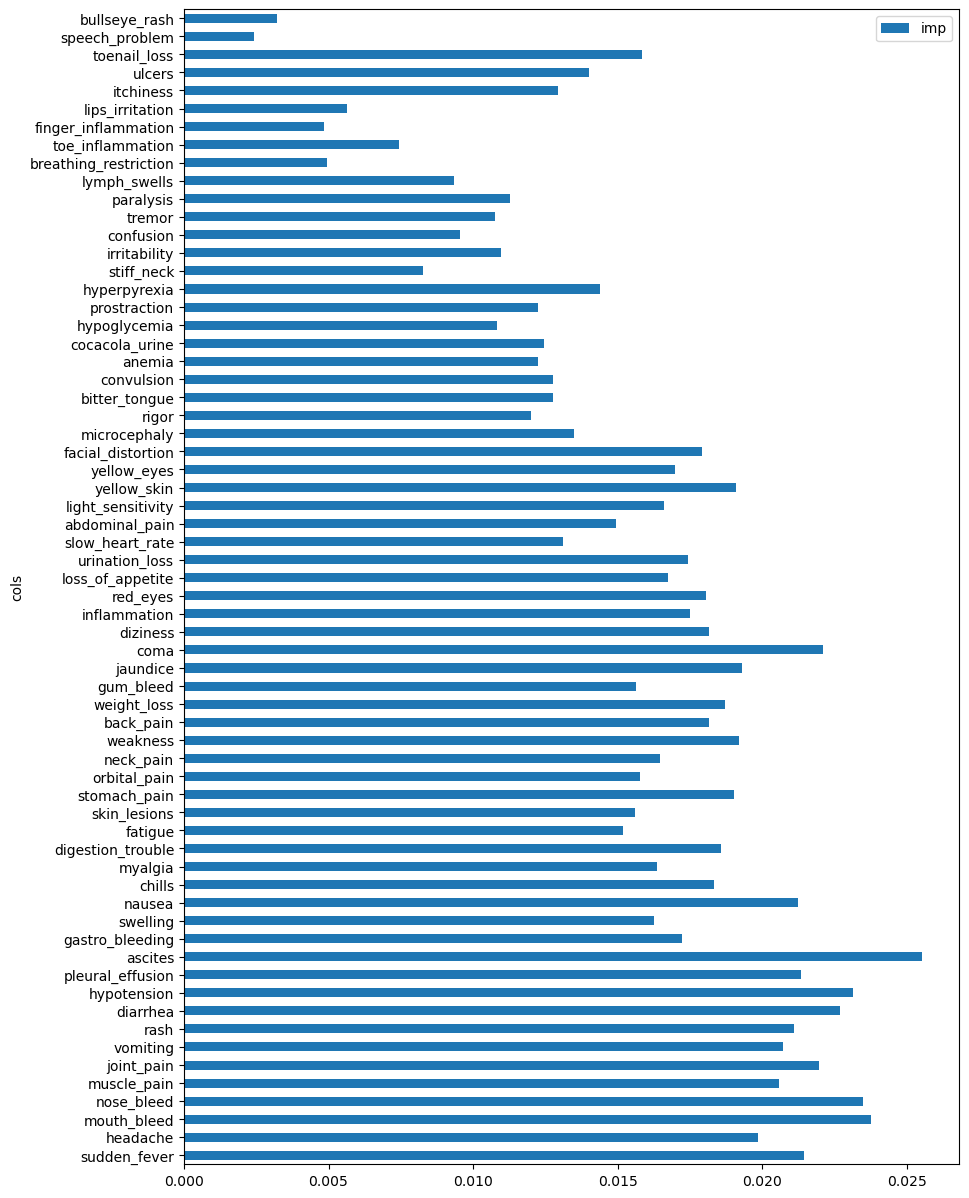

In [21]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh', figsize=(10, 15));

In [22]:
submit(rf.predict(tst_xs), 'random-forest')

In [23]:
Path('/kaggle/working').ls()

(#3) [Path('/kaggle/working/__notebook__.ipynb'),Path('/kaggle/working/sub-tree.csv'),Path('/kaggle/working/sub-random-forest.csv')]